In [1]:
!pip install -q kaggle

In [2]:
import os
import zipfile
from google.colab import files
from shutil import copyfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
import shutil
import random

%matplotlib inline

# Download File from Kaggle

In [3]:
#you need to create your own API first in kaggle
#upload kaggle json

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felixpratama","key":"a3f1e3c240e43be127334f9fe19c9a0e"}'}

In [4]:
#create a kaggle folder
!mkdir ~/.kaggle

In [5]:
#copy kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d hchen13/marvel-heroes

 99% 1.13G/1.13G [00:08<00:00, 195MB/s]
100% 1.13G/1.13G [00:08<00:00, 138MB/s]


# Extract Zip FIle

In [7]:
test_local_zip = '/content/marvel-heroes.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/dataset')

zip_ref.close()

In [8]:
source_dir = '/tmp/dataset/marvel'
os.listdir(source_dir)


['valid', 'train', 'marvel']

In [9]:
train_dir = os.path.join(source_dir, 'train')
valid_dir = os.path.join(source_dir, 'valid')

In [10]:
print("There ara {}  in train image".format(os.listdir(train_dir)))
print("\nThere are {} in test image".format(os.listdir(valid_dir)))

There ara ['black widow', 'thanos', 'hulk', 'loki', 'ironman', 'spider-man', 'captain america', 'doctor strange']  in train image

There are ['black widow', 'thanos', 'hulk', 'loki', 'ironman', 'spider-man', 'captain america', 'doctor strange'] in test image


In [11]:
new_training = 'tmp/new_training'
new_validation = 'tmp/new_validation'

# new_hulk_train = os.path.join(new_training, 'hulk')
new_capt_train = os.path.join(new_training, 'captain america')
new_ironman_train = os.path.join(new_training, 'iron man')

# new_hulk_valid = os.path.join(new_validation, 'hulk')
new_capt_valid = os.path.join(new_validation, 'captain america')
new_ironman_valid = os.path.join(new_validation, 'iron man')

try:
  os.makedirs(new_training)
  os.makedirs(new_validation)
  # os.makedirs(new_hulk_train)
  os.makedirs(new_capt_train)
  os.makedirs(new_ironman_train)
  # os.makedirs(new_hulk_valid)
  os.makedirs(new_capt_valid)
  os.makedirs(new_ironman_valid)
except:
  print("Files already exist")


In [12]:
print("Folders in new training directory: {}\n".format(os.listdir(new_training)))
print("Folders in new validation directory: {}".format(os.listdir(new_validation)))

Folders in new training directory: ['iron man', 'captain america']

Folders in new validation directory: ['iron man', 'captain america']


Because there is a lot of dataset so maybe in this case we just use 2 classses which is 'captain america' and 'iron man'. each classes has 300 train images and 50 validation images. so we have 600 images for train and 100 images for validation

In [13]:
#copy file from old folder into new folder

train_size = 300
valid_size = 50

# hulk_train = os.path.join(train_dir,'hulk')
# hulk_valid = os.path.join(valid_dir,'hulk')

capt_train = os.path.join(train_dir,'captain america')
capt_valid = os.path.join(valid_dir,'captain america')

ironman_train = os.path.join(train_dir,'ironman')
ironman_valid = os.path.join(valid_dir,'ironman')

for index in range(train_size):
  # hulk_train_path = os.path.join(hulk_train, os.listdir(hulk_train)[index])
  capt_train_path = os.path.join(capt_train, os.listdir(capt_train)[index])
  ironman_train_path = os.path.join(ironman_train, os.listdir(ironman_train)[index])

  # hulk_new = os.path.join(new_hulk_train, os.listdir(hulk_train)[index] )
  capt_new = os.path.join(new_capt_train, os.listdir(capt_train)[index])
  ironman_new = os.path.join(new_ironman_train, os.listdir(ironman_train)[index])

  # copyfile(hulk_train_path, hulk_new)
  copyfile(capt_train_path, capt_new)
  copyfile(ironman_train_path, ironman_new)

for index in range(valid_size):
  # hulk_valid_path = os.path.join(hulk_valid, os.listdir(hulk_valid)[index])
  capt_valid_path = os.path.join(capt_valid, os.listdir(capt_valid)[index])
  ironman_valid_path = os.path.join(ironman_valid, os.listdir(ironman_valid)[index])

  # hulk_new = os.path.join(new_hulk_valid, os.listdir(hulk_valid)[index] )
  capt_new = os.path.join(new_capt_valid, os.listdir(capt_valid)[index])
  ironman_new = os.path.join(new_ironman_valid, os.listdir(ironman_valid)[index])

  # copyfile(hulk_valid_path, hulk_new)
  copyfile(capt_valid_path, capt_new)
  copyfile(ironman_valid_path, ironman_new)

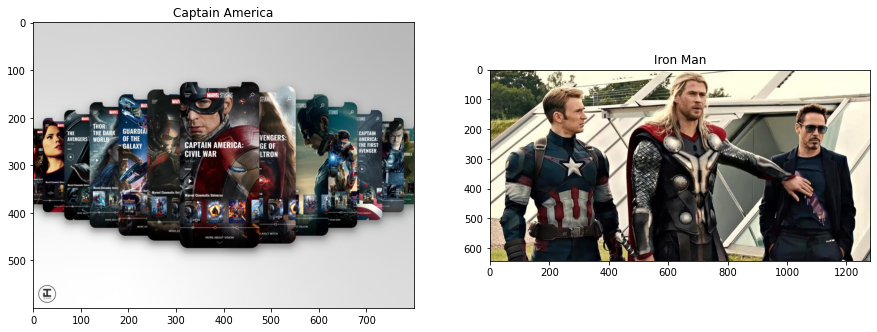

In [14]:
#read sample image of trainning
fig =plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sample_capt_train = os.path.join(new_capt_train, os.listdir(new_capt_train)[0])
sample_ironman_train = os.path.join(new_ironman_train, os.listdir(new_ironman_train)[0])

read_capt = mpimg.imread(sample_capt_train)
read_ironman = mpimg.imread(sample_ironman_train)

ax1.set_title("Captain America")
ax1.imshow(read_capt)

ax2.set_title("Iron Man")
ax2.imshow(read_ironman)

plt.show()


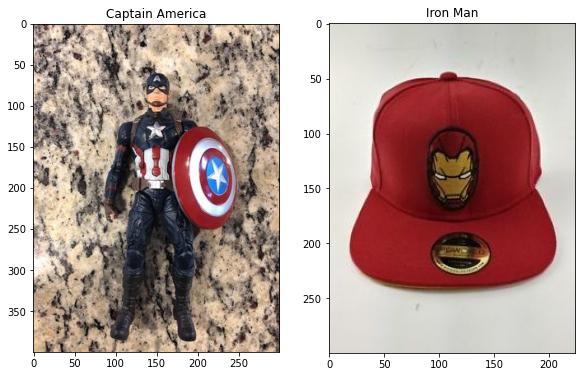

In [15]:
#read sample image of validation
fig =plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)



sample_capt_valid = os.path.join(new_capt_valid, os.listdir(new_capt_valid)[1])
sample_ironman_valid = os.path.join(new_ironman_valid, os.listdir(new_ironman_valid)[1])


read_capt = mpimg.imread(sample_capt_valid)
read_ironman = mpimg.imread(sample_ironman_valid)

ax1.set_title("Captain America")
ax1.imshow(read_capt)

ax2.set_title("Iron Man")
ax2.imshow(read_ironman)

plt.show()


# Using image augmentation to prevent overfitting

In [16]:
datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    shear_range=0.2,
                                    validation_split = 0.3,
                                    zoom_range = 0.2,
                                    height_shift_range = 0.2,
                                    width_shift_range = 0.2,
                                    vertical_flip = True,
                                    fill_mode = 'nearest')

training_generator = datagen.flow_from_directory(new_training,
                                                 target_size = (300,300),
                                                 batch_size = 60,
                                                 class_mode = 'binary',
    
)

valid_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = valid_datagen.flow_from_directory(new_validation,
                                                 target_size = (300,300),
                                                 batch_size = 20,
                                                 class_mode = 'binary',
                              
    
)

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Build Non-Convolutional Model

In [17]:
model_dnn = tf.keras.Sequential([
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dropout(0.2),
                                 
                                 tf.keras.layers.Dense(512, activation = 'relu'),
                                 tf.keras.layers.Dense(1, activation = 'sigmoid')
])



In [18]:
model_dnn.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history_dnn = model_dnn.fit(training_generator,
                            steps_per_epoch = 10, #600 / 60 = 10
                            epochs = 10,
                            validation_data = validation_generator,
                            validation_steps = 5, #100 / 20 = 5
                            verbose = 2)

Epoch 1/10
10/10 - 36s - loss: 151.8569 - accuracy: 0.5117 - val_loss: 29.3493 - val_accuracy: 0.5000 - 36s/epoch - 4s/step
Epoch 2/10
10/10 - 34s - loss: 26.9607 - accuracy: 0.5117 - val_loss: 10.3060 - val_accuracy: 0.5300 - 34s/epoch - 3s/step
Epoch 3/10
10/10 - 34s - loss: 9.3326 - accuracy: 0.5717 - val_loss: 6.0399 - val_accuracy: 0.5600 - 34s/epoch - 3s/step
Epoch 4/10
10/10 - 34s - loss: 4.4055 - accuracy: 0.5567 - val_loss: 6.4520 - val_accuracy: 0.5200 - 34s/epoch - 3s/step
Epoch 5/10
10/10 - 34s - loss: 4.8907 - accuracy: 0.5200 - val_loss: 6.0650 - val_accuracy: 0.5000 - 34s/epoch - 3s/step
Epoch 6/10
10/10 - 34s - loss: 5.6250 - accuracy: 0.5100 - val_loss: 1.8194 - val_accuracy: 0.5100 - 34s/epoch - 3s/step
Epoch 7/10
10/10 - 34s - loss: 2.8496 - accuracy: 0.5250 - val_loss: 2.2155 - val_accuracy: 0.5500 - 34s/epoch - 3s/step
Epoch 8/10
10/10 - 35s - loss: 2.3722 - accuracy: 0.5500 - val_loss: 1.4724 - val_accuracy: 0.5600 - 35s/epoch - 3s/step
Epoch 9/10
10/10 - 34s - lo

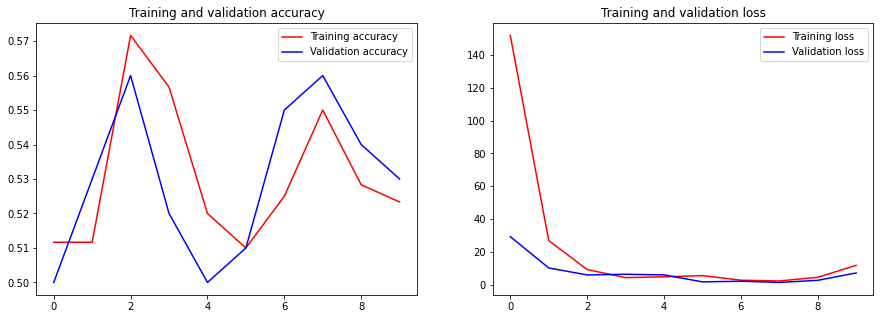

In [24]:
# Plot the training and validation accuracies for each epoch

acc = history_dnn.history['accuracy']
val_acc = history_dnn.history['val_accuracy']
loss = history_dnn.history['loss']
val_loss = history_dnn.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend(loc=0)


ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend(loc=0)


plt.show()

#Build Convolutional Model

In [20]:
model_cnn = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3), activation ='relu', input_shape=(300,300,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3), activation ='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
 
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)      

In [21]:
model_cnn.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history_cnn = model_cnn.fit(training_generator,
                            steps_per_epoch = 10,
                            epochs = 10,
                            validation_data = validation_generator,
                            validation_steps = 5,
                            verbose = 2)

Epoch 1/10
10/10 - 79s - loss: 1.1275 - accuracy: 0.4633 - val_loss: 0.6924 - val_accuracy: 0.5000 - 79s/epoch - 8s/step
Epoch 2/10
10/10 - 74s - loss: 0.6930 - accuracy: 0.5033 - val_loss: 0.6904 - val_accuracy: 0.5000 - 74s/epoch - 7s/step
Epoch 3/10
10/10 - 73s - loss: 0.6907 - accuracy: 0.5217 - val_loss: 0.6840 - val_accuracy: 0.5100 - 73s/epoch - 7s/step
Epoch 4/10
10/10 - 74s - loss: 0.6900 - accuracy: 0.5267 - val_loss: 0.6919 - val_accuracy: 0.5000 - 74s/epoch - 7s/step
Epoch 5/10
10/10 - 73s - loss: 0.6764 - accuracy: 0.5633 - val_loss: 0.7046 - val_accuracy: 0.6100 - 73s/epoch - 7s/step
Epoch 6/10
10/10 - 73s - loss: 0.6541 - accuracy: 0.6333 - val_loss: 0.6946 - val_accuracy: 0.5800 - 73s/epoch - 7s/step
Epoch 7/10
10/10 - 75s - loss: 0.6611 - accuracy: 0.6183 - val_loss: 0.6960 - val_accuracy: 0.6300 - 75s/epoch - 7s/step
Epoch 8/10
10/10 - 73s - loss: 0.6414 - accuracy: 0.6433 - val_loss: 0.6815 - val_accuracy: 0.6300 - 73s/epoch - 7s/step
Epoch 9/10
10/10 - 73s - loss: 0

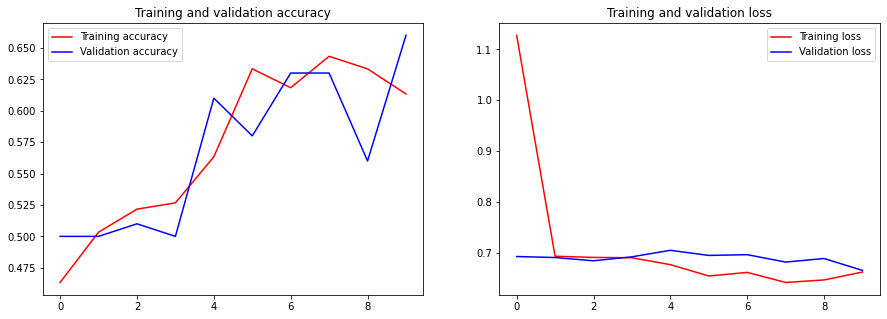

In [23]:
# Plot the training and validation accuracies for each epoch

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend(loc=0)


ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend(loc=0)


plt.show()